House Price Prediction 

Importing necessary dependencies

In [1]:
#Importing necessary dependencies
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
#Importing the The house price dataset
df = pd.read_csv('data.csv',parse_dates=True, na_values={'price': 0,'bedrooms': 0,})

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4598 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4598.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.579059e+05,3.402349,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.639299e+05,0.906273,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


EDA Process

In [6]:
df.isna().sum()

date              0
price            49
bedrooms          2
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df.shape

(4549, 18)

Removal of outliers

In [9]:
# Calculating Z-scores
df['price_zscr'] = zscore(df['price'])
df['sqft_living_zscr'] = zscore(df['sqft_living'])
df['sqft_lot_zscr'] = zscore(df['sqft_lot'])
df['sqft_above_zscr'] = zscore(df['sqft_above'])
df['sqft_basement_zscr'] = zscore(df['sqft_basement'])

# Filtering based on Z-scores
df = df[(df.price_zscr < 3) & (df.price_zscr > -3)]
df = df[(df.sqft_living_zscr < 3) & (df.sqft_living_zscr > -3)]
df = df[(df.sqft_lot_zscr < 3) & (df.sqft_lot_zscr > -3)]
df = df[(df.sqft_above_zscr < 3) & (df.sqft_above_zscr > -3)]
df = df[(df.sqft_basement_zscr < 3) & (df.sqft_basement_zscr > -3)]


In [10]:
df.drop(columns=['price_zscr','sqft_living_zscr','sqft_lot_zscr','sqft_above_zscr','sqft_basement_zscr'],inplace=True)

In [11]:
df.shape

(4361, 18)

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.361000e+03,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,5.188209e+05,3.362990,2.110640,2042.627608,10688.168998,1.504357,0.004815,0.200413,3.453336,1753.710846,288.916762,1970.325384,813.535198
std,2.837418e+05,0.882343,0.720719,797.319997,12729.773715,0.538307,0.069234,0.702035,0.675718,749.303444,416.966221,29.853931,980.300135
min,7.800000e+03,1.000000,0.750000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1440.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1950.000000,0.000000
50%,4.550000e+05,3.000000,2.250000,1940.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,1550.000000,0.000000,1974.000000,0.000000
75%,6.395000e+05,4.000000,2.500000,2540.000000,10375.000000,2.000000,0.000000,0.000000,4.000000,2220.000000,590.000000,1996.000000,1999.000000
max,2.199900e+06,9.000000,5.750000,4960.000000,120661.000000,3.500000,1.000000,4.000000,5.000000,4380.000000,1690.000000,2014.000000,2014.000000


Removing unused features

In [13]:
#There is only one country in the dataset
df.country.nunique()

1

In [14]:
df[df['statezip'].str[0.2] != 'WA']
#Only one state in the dataset which is WA

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [15]:
df.city.nunique()

44

In [16]:
df.drop(columns=["country","statezip","street","date","city"],inplace=True)

Anaysis and Visualization

In [17]:
px.bar(
    x=df.bedrooms.value_counts().index,
    y=df.bedrooms.value_counts().values,
    labels={"x": "Number of Bedrooms", "y": "Number of Houses"},
    title="Number of Bedrooms with Number of Houses",
    color=df.bedrooms.value_counts().index
)

In [18]:
px.bar(
    x=df.bathrooms.value_counts().index,
    y=df.bathrooms.value_counts().values,
    labels={"x": "Number of Bathrooms", "y": "Number of Houses"},
    title="Number of Bathrooms with Number of Houses",
    color=df.bathrooms.value_counts().index
)

In [19]:
px.scatter(
    df,
    y="sqft_living",
    x="price",
    title = "Living Square Footage Vs Price",
)

In [20]:
px.scatter(
    df,
    y="sqft_lot",
    x="price",
    title = "Lot Square Footage Vs Price",
)

In [21]:
px.bar(
    x = df.floors.value_counts().index,
    y = df.floors.value_counts().values,
    labels={"x": "Number of Floors","y": "Number of Houses"},
    title = "Number of Floors with Number of Houses",
    color=df.floors.value_counts().index,
)

In [22]:
px.pie(
    df,
    names={'0' : 'No Waterfront', '1': 'Waterfront'},
    values=df.waterfront.value_counts().values,
    title="Houses with Waterfront"

)

In [23]:
px.bar(
    x=df.view.value_counts().index,
    y=df.view.value_counts().values,
    labels={"x":"View","y": "Number of Houses"},
    title="View with Number of Houses",
    color=df.view.value_counts().index,
)

In [24]:
px.bar(
    x=df.condition.value_counts().index,
    y=df.condition.value_counts().values,
    labels={"x" : "Condition","y" : "Number of Houses"},
    title="Condition with Number of Houses",
    color=df.condition.value_counts().index,
)

In [25]:
px.scatter(
    df,
    y="sqft_above",
    x="price",
    title="Above Square Footage vs Price",
)

In [26]:
px.scatter(
    df,
    y="sqft_basement",
    x="price",
    title="Basement Square Footage vs Price",
)

In [27]:
px.bar(
    x=df.yr_built.value_counts().index,
    y=df.yr_built.value_counts().values,
    labels={"x" : "Year Built", "y" :"Number of Houses"},
    title="Year Built with Number of Houses",
    color=df.yr_built.value_counts().index,
)

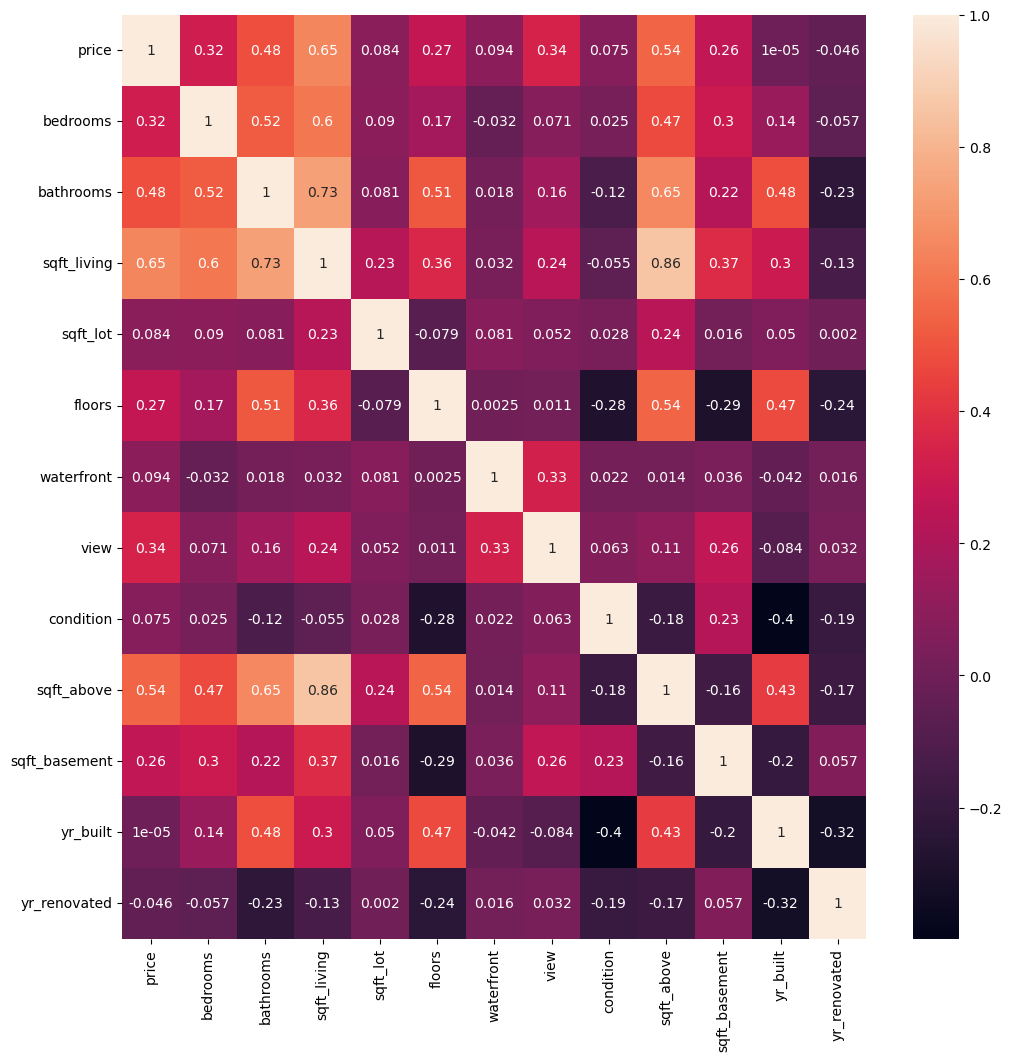

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True);

Data Preprocessing

In [29]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

Encoding city column

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


In [31]:
pd.set_option('display.max_columns', None)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


Split Data

In [32]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

Feature Scaling(Standardization)

In [33]:
std_X = StandardScaler()
X_train[:, 0:5] = std_X.fit_transform(X_train[:, 0:5])
X_test[:, 0:5] = std_X.fit_transform(X_test[:, 0:5])
X_test[:, 6:11] = std_X.fit_transform(X_test[:, 6:11])
X_test[:, 6:11] = std_X.fit_transform(X_test[:,6:11])

std_Y = StandardScaler()
Y_train = std_Y.fit_transform(Y_train.reshape(-1,1)).flatten()

Regression Models

Multiple Linear Regression

Training the model

In [34]:
multi_lr = LinearRegression()
multi_lr.fit(X_train,Y_train)

LinearRegression()

In [35]:
Y_pred = multi_lr.predict(X_test)
Y_train_pred = multi_lr.predict(X_train)
r2_lr_train = r2_score(Y_train, Y_train_pred)
r2_lr_test = r2_score(Y_test, std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)
mse_lr_train = mean_squared_error(Y_train, Y_train_pred)
mse_lr_test = mean_squared_error(Y_test, std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_lr_train)
print("Mean Squared Error of Test:", mse_lr_test)

R2 Train Score: 0.5172455719626674
R2 Test Score: -213.49976496471308
Mean Squared Error of Train: 0.48275442803733254
Mean Squared Error of Test: 17055918365068.068


Polynomial Regression

Training the model

In [36]:
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, Y_train)

LinearRegression()

Evaluating the model

In [48]:
Y_pred = poly_lr.predict(X_test_poly)
Y_train_pred = poly_lr.predict(X_train_poly)
r2_poly_train = r2_score(Y_train,Y_train_pred)
r2_poly_test = r2_score(Y_test,std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_poly_train)
print("R2 Test Score:", r2_poly_test)
mse_poly_train = mean_squared_error(Y_train, Y_train_pred)
mse_poly_test = mean_squared_error(Y_test, std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_poly_train)
print("Mean Squared Error of Test:", mse_poly_test)

R2 Train Score: 0.5547416301961476
R2 Test Score: -11022.428785297036
Mean Squared Error of Train: 0.44525836980385236
Mean Squared Error of Test: 876526375197183.1


In [49]:
print(Y_test[0])
print(std_Y.inverse_transform(Y_pred.reshape(-1,1))[0])

478000.0
[30009649.91920496]


Decision Tree

Training the model

In [39]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

Evaluationg the model

In [50]:
Y_pred = dec_tree.predict(X_test)
Y_train_pred = dec_tree.predict(X_train)
r2_tree_train = r2_score(Y_train, Y_train_pred)
r2_tree_test = r2_score(Y_test, std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_tree_train)
print("R2 Test Score:", r2_tree_test)
mse_tree_train = mean_squared_error(Y_train, Y_train_pred)
mse_tree_test = mean_squared_error(Y_test, std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_tree_train)
print("Mean Squared Error of Test:", mse_tree_test)

R2 Train Score: 0.9999900244757493
R2 Test Score: -1.2092549722032446
Mean Squared Error of Train: 9.975524250740557e-06
Mean Squared Error of Test: 175668595533.04437


Random Forest

Training the model

In [51]:
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 0)
random_forest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

Evaluating the model

In [54]:
Y_pred = random_forest.predict(X_test)
Y_train_pred = random_forest.predict(X_train)
r2_forest_train = r2_score(Y_train,Y_train_pred)
r2_forest_test = r2_score(Y_test,std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_forest_train)
print("R2 Test Score:", r2_forest_test)
mse_forest_train = mean_squared_error(Y_train, Y_train_pred)
mse_forest_test = mean_squared_error(Y_test, std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_forest_train)
print("Mean Squared Error of Test:", mse_forest_test)

R2 Train Score: 0.9322897342367443
R2 Test Score: 0.23190234366034268
Mean Squared Error of Train: 0.06771026576325564
Mean Squared Error of Test: 61075176120.05056


Support Vector Regression

Training the model

In [43]:
svr = SVR(kernel='linear',)
svr.fit(X_train,Y_train)

SVR(kernel='linear')

Evaluating the model

In [55]:
Y_pred = svr.predict(X_test)
Y_train_pred = svr.predict(X_train)
r2_svr_train = r2_score(Y_train,Y_train_pred)
r2_svr_test = r2_score(Y_test,std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_svr_train)
print("R2 Test Score:", r2_svr_test)
mse_svr_train = mean_squared_error(Y_train, Y_train_pred)
mse_svr_test = mean_squared_error(Y_test, std_Y.inverse_transform(Y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_svr_train)
print("Mean Squared Error of Test:", mse_svr_test)

R2 Train Score: -43.57060729247629
R2 Test Score: -35052.82892816407
Mean Squared Error of Train: 44.57060729247629
Mean Squared Error of Test: 2787300231681760.0


Comparing Models

In [63]:
from tabulate import tabulate

In [64]:
# Define your arrays with consistent lengths
models = [
    'Multiple Linear Regression',
    'Polynomial Regression',
    'Decision Tree',
    'Support Vector Regression'
]

training_r2_scores = [
    r2_lr_train,
    r2_poly_train,
    r2_tree_train,
    r2_svr_train
]

training_mse_scores = [
    mse_lr_train,
    mse_poly_train,
    mse_tree_train,
    mse_svr_train
]

testing_r2_scores = [
    r2_lr_test,
    r2_poly_test,
    r2_tree_test,
    r2_svr_test
]

testing_mse_scores = [
    mse_lr_test,
    mse_poly_test,
    mse_tree_test,
    mse_svr_test
]

# Check if all arrays have the same length
array_lengths = [len(models), len(training_r2_scores), len(training_mse_scores), len(testing_r2_scores), len(testing_mse_scores)]
if len(set(array_lengths)) != 1:
    raise ValueError("Arrays have different lengths")

# Create a list of lists containing the data
data = []
for model, tr_r2, tr_mse, te_r2, te_mse in zip(models, training_r2_scores, training_mse_scores, testing_r2_scores, testing_mse_scores):
    data.append([model, tr_r2, tr_mse, te_r2, te_mse])

# Create the table
table = tabulate(data, headers=["Model", "Training R2 Score", "Training Mean Square Error", "Testing R2 Score", "Testing Mean Square Error"], tablefmt="pretty")

# Display the table
print(table)

+----------------------------+--------------------+----------------------------+---------------------+---------------------------+
|           Model            | Training R2 Score  | Training Mean Square Error |  Testing R2 Score   | Testing Mean Square Error |
+----------------------------+--------------------+----------------------------+---------------------+---------------------------+
| Multiple Linear Regression | 0.5172455719626674 |    0.48275442803733254     | -213.49976496471308 |    17055918365068.068     |
|   Polynomial Regression    | 0.5547416301961476 |    0.44525836980385236     | -11022.428785297036 |     876526375197183.1     |
|       Decision Tree        | 0.9999900244757493 |    0.06771026576325564     | -1.2092549722032446 |     61075176120.05056     |
| Support Vector Regression  | -43.57060729247629 |     44.57060729247629      | -35052.82892816407  |    2787300231681760.0     |
+----------------------------+--------------------+----------------------------+---